In [69]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# from nltk.stem.snowball import SnowballStemmer

# import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [70]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [71]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [8]:
!conda install keras

/bin/bash: line 1: conda: command not found


In [72]:
import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import  to_categorical
from keras.datasets import imdb

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **PART A**

## **1. Read and explore the data**

In [73]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [74]:
#exploring the data
print('Training entries: {}, labels: {}'.format(len(x_train), len(y_train)))
print('Test entries: {}, labels: {}'.format(len(x_test), len(y_test)))

print(x_train[0])
print(y_train[0])

Training entries: 25000, labels: 25000
Test entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345,

## **2. Perform relevant sequence adding on the data.**

In [75]:
#pad the sequences
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

## **3. Print shape of features and labels**


In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 500)
(25000, 500)
(25000,)
(25000,)


In [77]:
# Print value of any one feature and its label
print("Sample feature:", x_train[0])
print("Sample label:", y_train[0])

Sample feature: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0 

## **4. Decode the feature value to get original sentence**

In [78]:
# Get word index
word_index = imdb.get_word_index()

# Get reverse word index
reverse_word_index = {index: word for word, index in word_index.items()}

# Decode the feature value to get original sentence
def decode(review):
    decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in review])
    return decoded_review

print("Sample feature (original sentence):", decode(x_train[0]))

Sample feature (original sentence): ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just bril

In [79]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [80]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [81]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [82]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


## **5. Design, train, tune and test a sequential model.**

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Conv1D, MaxPooling1D

In [84]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [85]:
# Fit-Train model

NumEpochs = 15
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 3s 68ms/step - loss: 1.2195 - acc: 0.6289 - val_loss: 0.7823 - val_acc: 0.8252
Epoch 2/15
30/30 [==============================] - 1s 23ms/step - loss: 0.7646 - acc: 0.7368 - val_loss: 0.7154 - val_acc: 0.7932
Epoch 3/15
30/30 [==============================] - 1s 24ms/step - loss: 0.7278 - acc: 0.7803 - val_loss: 0.6754 - val_acc: 0.8096
Epoch 4/15
30/30 [==============================] - 1s 23ms/step - loss: 0.7007 - acc: 0.7975 - val_loss: 0.6659 - val_acc: 0.8233
Epoch 5/15
30/30 [==============================] - 1s 23ms/step - loss: 0.6817 - acc: 0.8091 - val_loss: 0.6154 - val_acc: 0.8535
Epoch 6/15
30/30 [==============================] - 1s 23ms/step - loss: 0.6686 - acc: 0.8199 - val_loss: 0.5949 - val_acc: 0.8567
Epoch 7/15
30/30 [==============================] - 1s 23ms/step - loss: 0.6537 - acc: 0.8299 - val_loss: 0.5845 - val_acc: 0.8584
Epoch 8/15
30/30 [==============================] - 1s 24ms/step - loss: 0.6421 - a

In [86]:
results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

782/782 [==============================] - 2s 3ms/step - loss: 0.5590 - acc: 0.8637
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.5589895844459534, 0.8637199997901917]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

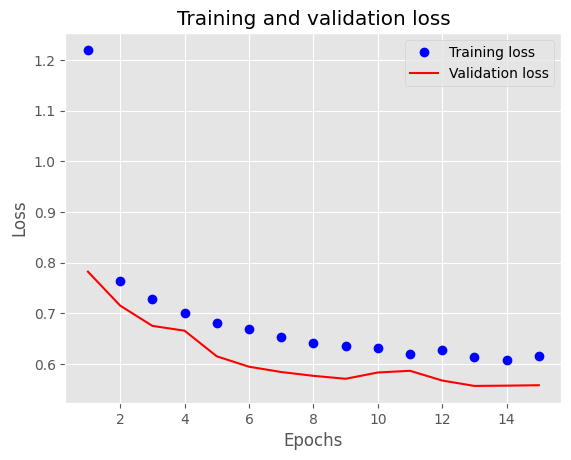

In [87]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

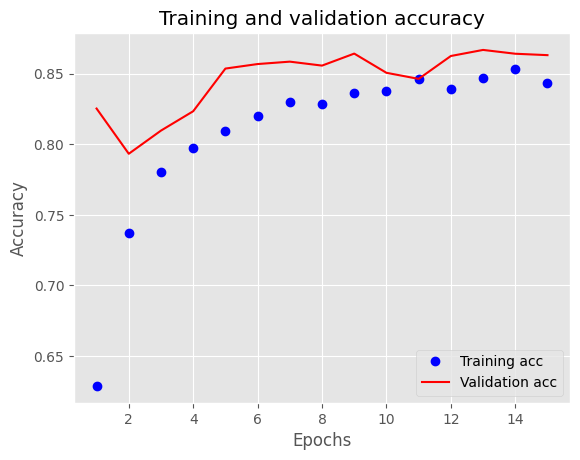

In [88]:
# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **6. Use the designed model to print the prediction on any one sample.**

In [28]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.23419413],
       [0.9941451 ],
       [0.82454926],
       ...,
       [0.11728922],
       [0.10189261],
       [0.5928658 ]], dtype=float32)

# **PART B**

In [29]:
from wordcloud import WordCloud
import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import string
import nltk
from nltk.corpus import stopwords

## **1. Read and explore the data**

In [30]:
data_df = pd.read_json('/content/drive/My Drive/AIML/NLP/Project2/Sarcasm_Headlines_Dataset.json', lines=True)

In [31]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [32]:
data_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


<Axes: xlabel='is_sarcastic', ylabel='count'>

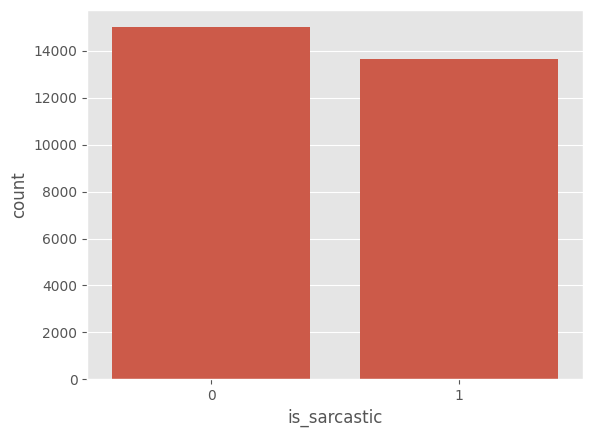

In [33]:
sns.countplot(x='is_sarcastic', data=data_df)

In [34]:
data_df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [35]:
import matplotlib as plt

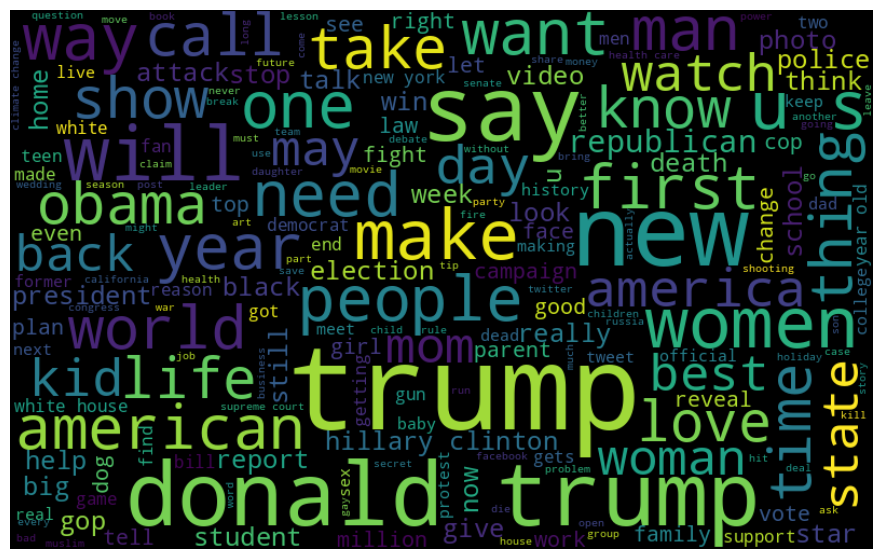

In [36]:
# Non sarcastic headlines wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=11, max_font_size=110).generate(' '.join(data_df[data_df['is_sarcastic'] == 0].headline))
plt.pyplot.figure(figsize=(12, 7))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.show()

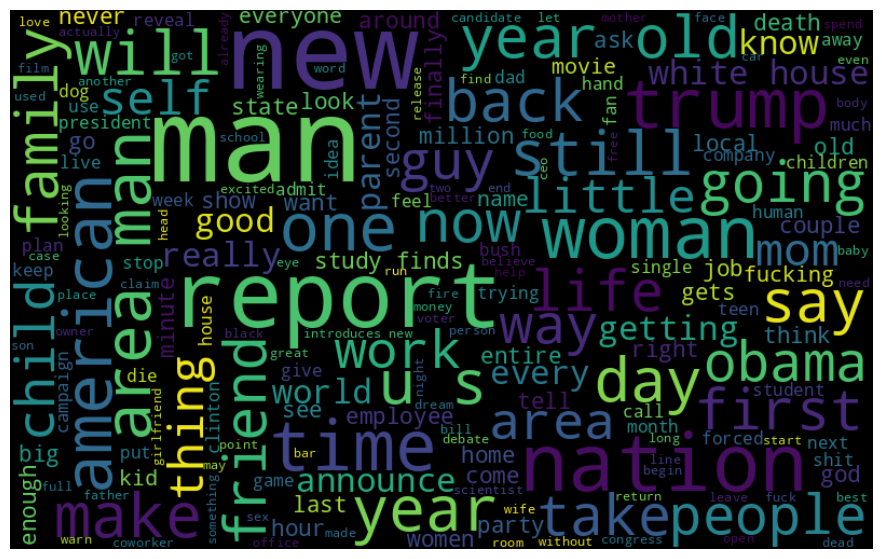

In [37]:
# Sarcastic headlines wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=31, max_font_size=110).generate(' '.join(data_df[data_df['is_sarcastic'] == 1].headline))
plt.pyplot.figure(figsize=(12, 7))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.show()

## **2. Retain relevant columns**

In [38]:
del data_df['article_link']

In [39]:
new_df = data_df.head(1000)
new_df.head()
del(data_df)
df = new_df.copy()

## **3. Get length of each sentence**

In [40]:
#get the length of each headline without adding to the dataframe
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))
df.head()

,is_sarcastic,headline,headline_length
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


## **4. Define parameters [3 Marks]**

In [41]:
max_features = 3000
maxlen = 200
embed_size = 200
batch_size = 120

Cleaning Data:
  1. Preprocessing text is an important step in natural language processing (NLP) and before we move on we have to clean the data so that it can be used in the NLP model.

In [42]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english') #English language's stop words
def textpreprocess(s):
    """This function cleans the text
    Input: string to be cleaned
    Return: string after cleaning
    """
    words = [] # empty list

    s = s.strip().lower() # lower the string
    s = re.sub('\[.*?\]', '', s) # removes symbols (.*?\)
    s = re.sub('https?://\S+|www\.\S+', '', s) # remove URLS
    s = re.sub('<.*?>+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s) # remove punctuations
    s = re.sub('\n', '', s) # remove next line character
    s = re.sub('\w*\d\w*', '', s)

    words = s.split() # split the string into list of words
    words = [word for word in words if word not in stop_words] # removing stop words
    s = ' '.join(words) # converting list to string

    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
df['headline'] = df['headline'].apply(textpreprocess)

## **5. Get indices for words [3 Marks]**

In [44]:
#get indices for words
word2idx = {}
for headline in df['headline']:
    for word in headline.split():
        if word not in word2idx:
            word2idx[word] = len(word2idx)

#get indices for labels
label2idx = {'0': 0, '1': 1}

# **6. Create features and labels**

In [45]:
X = []
for headline in df['headline']:
    indices = []
    for word in headline.split():
        indices.append(word2idx[word])
    X.append(indices)

y = []
for label in df['is_sarcastic']:
    y.append(label2idx[str(label)])

## **7. Get vocabulary size**

In [46]:
vocabulary_size = len(word2idx)
print(vocabulary_size)

4027


# **8. Create a weight matrix using GloVe embeddings**

Splitting the data into training and test sets.


In [47]:
x_train,x_test,y_train,y_test = train_test_split(df.headline,df.is_sarcastic, test_size = 0.3 , random_state = 5)

In [48]:
from keras.preprocessing import text, sequence

Tokenizing the text data and padding it to the same length.


In [49]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen=maxlen)

tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen=maxlen)

Loading the pre-trained GloVe embeddings and creating an embedding matrix.


In [50]:
EMBEDDING_FILE = '/content/drive/My Drive/AIML/NLP/Project2/glove.6B/glove.6B.200d.txt'

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [51]:
all_embs = np.stack(list(embeddings_index.values()))
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words= min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

# **9. Define and compile a Bidirectional LSTM model.**

In [52]:
model = Sequential()
model.add(
    tf.keras.layers.Embedding(
        nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=True
    )
)
model.add(
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5,),
    ),
)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          600000    
                                                                 
 bidirectional (Bidirection  (None, 256)               336896    
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 937153 (3.57 MB)
Trainable params: 937153 (3.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **10. Fit the model and check the validation accuracy**

In [59]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = 5)

Epoch 1/5
6/6 [==============================] - 12s 2s/step - loss: 0.1539 - acc: 0.9443 - val_loss: 1.0554 - val_acc: 0.6100
Epoch 2/5
6/6 [==============================] - 9s 1s/step - loss: 0.0587 - acc: 0.9814 - val_loss: 1.1315 - val_acc: 0.6100
Epoch 3/5
6/6 [==============================] - 10s 2s/step - loss: 0.0176 - acc: 0.9929 - val_loss: 1.2688 - val_acc: 0.6167
Epoch 4/5
6/6 [==============================] - 8s 1s/step - loss: 0.0140 - acc: 0.9914 - val_loss: 1.3329 - val_acc: 0.6333
Epoch 5/5
6/6 [==============================] - 10s 2s/step - loss: 0.0077 - acc: 0.9971 - val_loss: 1.5765 - val_acc: 0.6200


In [60]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

10/10 [==============================] - 1s 114ms/step - loss: 1.5765 - acc: 0.6200
Accuracy of the model on Testing Data is -  62.00000047683716


In [61]:
pred = model.predict(X_test)
pred[:5]

10/10 [==============================] - 1s 112ms/step


array([[9.2589748e-01],
       [7.6990132e-04],
       [4.3353856e-02],
       [6.7728042e-04],
       [4.0035946e-03]], dtype=float32)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [63]:
y_pred_binary = (pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary, target_names=['Not Sarcastic', 'Sarcastic']))


               precision    recall  f1-score   support

Not Sarcastic       0.61      0.77      0.68       157
    Sarcastic       0.64      0.45      0.53       143

     accuracy                           0.62       300
    macro avg       0.63      0.61      0.61       300
 weighted avg       0.62      0.62      0.61       300



In [64]:
cm = confusion_matrix(y_test,y_pred_binary)
cm

array([[121,  36],
       [ 78,  65]])

<Axes: >

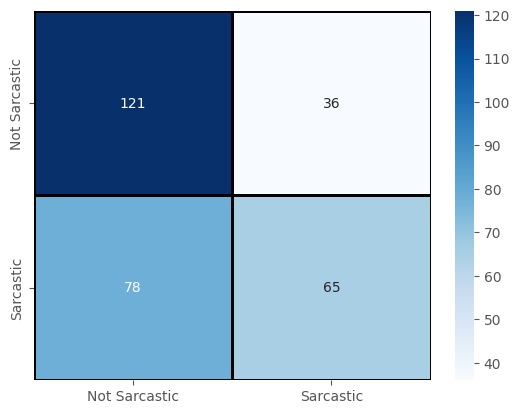

In [67]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])

plt.figure.Figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])